## Libraries

In [1]:
import pandas as pd
from IPython.display import Image
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as normal
from scipy.stats import skew,kurtosis

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import linear_model

In [2]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [3]:
import matplotlib.pyplot as plt

In [4]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
train_data.shape

(1460, 81)

In [9]:
test_data.shape

(1459, 80)

In [10]:
houses_data = train_data.append(test_data,ignore_index=True)
np.unique(houses_data.index)

C:\Users\dusic\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


array([   0,    1,    2, ..., 2916, 2917, 2918], dtype=int64)

In [11]:
houses_data.Id

0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
        ... 
2889    2890
2890    2891
2891    2892
2892    2893
2893    2894
2894    2895
2895    2896
2896    2897
2897    2898
2898    2899
2899    2900
2900    2901
2901    2902
2902    2903
2903    2904
2904    2905
2905    2906
2906    2907
2907    2908
2908    2909
2909    2910
2910    2911
2911    2912
2912    2913
2913    2914
2914    2915
2915    2916
2916    2917
2917    2918
2918    2919
Name: Id, Length: 2919, dtype: int64

In [12]:
houses_data.shape

(2919, 81)

In [13]:
houses_data.shape

(2919, 81)

In [14]:
houses_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

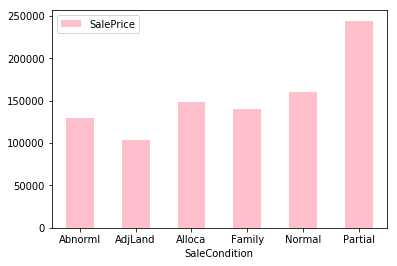

In [15]:
SaleCondition_pivot=houses_data.pivot_table(index='SaleCondition',
values='SalePrice',aggfunc=np.median)
SaleCondition_pivot.plot(kind='bar',color='pink')
plt.xticks(rotation=0)

In [16]:
houses_data['SaleCondition_d']=np.where(houses_data['SaleCondition']!='Partial',0,1)
#test_data['SaleCondition_d']=np.where(test_data['SaleCondition']!='Partial',0,1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

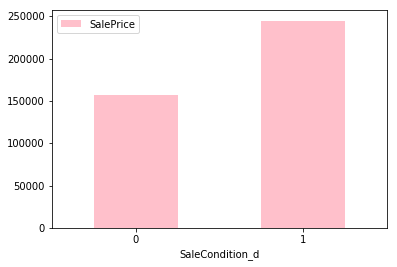

In [17]:
SaleCondition_pivot=houses_data.pivot_table(index='SaleCondition_d',
values='SalePrice',aggfunc=np.median)
SaleCondition_pivot.plot(kind='bar',color='pink')
plt.xticks(rotation=0)

In [18]:
houses_data.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [19]:
houses_data.Id

0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
        ... 
2889    2890
2890    2891
2891    2892
2892    2893
2893    2894
2894    2895
2895    2896
2896    2897
2897    2898
2898    2899
2899    2900
2900    2901
2901    2902
2902    2903
2903    2904
2904    2905
2905    2906
2906    2907
2907    2908
2908    2909
2909    2910
2910    2911
2911    2912
2912    2913
2913    2914
2914    2915
2915    2916
2916    2917
2917    2918
2918    2919
Name: Id, Length: 2919, dtype: int64

In [20]:
test_data.Utilities.value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [21]:
test_data.Utilities.isna().sum()

2

In [22]:
#Utilities should be removed: all records are "AllPub", and only one recors ia "NoSeWa" in the train set 
#and 2 NA in the test set.

In [23]:
houses_data["SalePrice"].groupby(houses_data["Neighborhood"]).median().sort_values()

Neighborhood
MeadowV     88000.0
IDOTRR     103000.0
BrDale     106000.0
OldTown    119000.0
Edwards    121750.0
BrkSide    124300.0
Sawyer     135000.0
Blueste    137500.0
SWISU      139500.0
NAmes      140000.0
NPkVill    146000.0
Mitchel    153500.0
SawyerW    179900.0
Gilbert    181000.0
NWAmes     182900.0
Blmngtn    191000.0
CollgCr    197200.0
ClearCr    200250.0
Crawfor    200624.0
Veenker    218000.0
Somerst    225500.0
Timber     228475.0
StoneBr    278000.0
NoRidge    301500.0
NridgHt    315000.0
Name: SalePrice, dtype: float64

In [24]:
cols=houses_data.columns

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

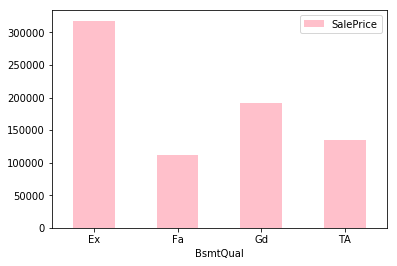

In [25]:
i=14 #2
SaleCondition_pivot=houses_data.pivot_table(index=cols[i],
values='SalePrice',aggfunc=np.median)
SaleCondition_pivot.plot(kind='bar',color='pink')
plt.xticks(rotation=0)

There are different ways to handle the missing values(**nan** values). The first one is to **drop the columns** with missing values. The second one is to **drop the rows** with the missing values, and third is to **impute** those missing values.

## Target Variable

The analysis of the variable we need to predict!!!

In [26]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [27]:
print('kurtosis',kurtosis(train_data.SalePrice),'skewness',
skew(train_data.SalePrice)) 

kurtosis 6.509812011089439 skewness 1.880940746034036


C:\Users\dusic\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


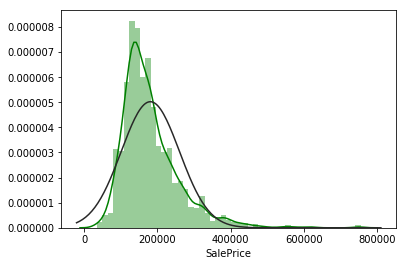

In [28]:
sns.distplot(train_data.SalePrice,color="green",fit=normal)

transforming the dependent variable. 


Multiple regression works most reliably when the inputs come in a form that is the well-known distribution of the data . 

In order to make the variable better fit the assumptions underlying regression, we need to transform it. There are a number of ways to do this, but the most common for our purposes is to take the log of ‘Giving’. (This is easily done in Data Desk using a derived variable and the ‘log’ statement; just remember to take the log of ‘Giving’ plus a nominal value of 1, because you can’t take a log of zero.) When we call up a histogram of ‘Log of Lifetime Giving’, we can see that the distribution is significantly closer to the normal probability distribution. It’s a bit skewed to one side, but it’s a big improvement.


The distribution of the target variable is positively skewed.
We will perform the log-transform of the target variable in order to 
improve the linearity of the data.

BUT ALSO, predictions of the final model would also be log-transformed 
so before submission values of the predictions will be converted 
back to their original form

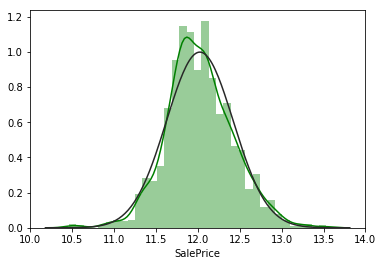

In [29]:
sns.distplot(np.log1p(train_data.SalePrice),color="green",fit=normal)

In [30]:
houses_data.SalePrice=houses_data.SalePrice.fillna(0)

In [31]:
houses_data.Id

0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
        ... 
2889    2890
2890    2891
2891    2892
2892    2893
2893    2894
2894    2895
2895    2896
2896    2897
2897    2898
2898    2899
2899    2900
2900    2901
2901    2902
2902    2903
2903    2904
2904    2905
2905    2906
2906    2907
2907    2908
2908    2909
2909    2910
2910    2911
2911    2912
2912    2913
2913    2914
2914    2915
2915    2916
2916    2917
2917    2918
2918    2919
Name: Id, Length: 2919, dtype: int64

In [32]:
houses_data.SalePrice=np.log1p(houses_data.SalePrice)

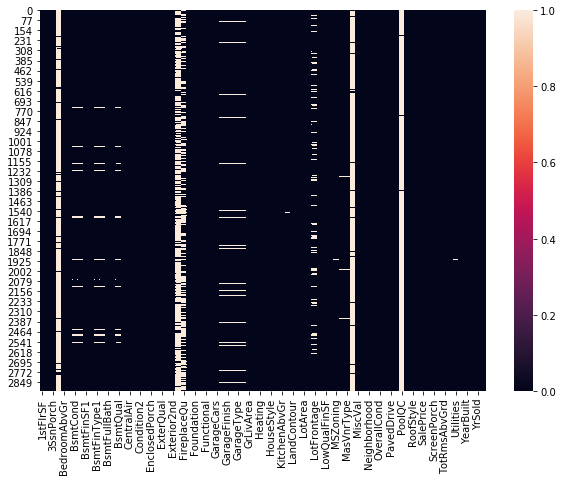

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(houses_data.isnull())

In [34]:
#Skewed features

numeric_feats = houses_data.dtypes[houses_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = houses_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.fillna(-273)
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.145323
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.929996


In [35]:

#Box Cox Transformation of (highly) skewed features

#We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

#Note that setting  λ=0  is equivalent to log1p used above for the target variable.

#See this page for more details on Box Cox Transformation as well as the scipy function's page
#skewness.dropna(inplace=True)
skewness = skewness[(abs(skewness) > 0.4)]
#print(skewness)
skewness.dropna(inplace=True)
print(skewness)

                      Skew
MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.145323
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.929996
SaleCondition_d   3.000985
MasVnrArea        2.601240
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.502351
1stFlrSF          1.469604
BsmtFinSF1        1.424989
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.162285
BsmtUnfSF         0.919351
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.623741
OverallCond       0.570312
YearRemodAdd     -0.451020
YearBuilt        -0.599806


In [36]:

print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    houses_data[feat] = boxcox1p(houses_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])
#There are 59 skewed numerical features to Box Cox transform

There are 29 skewed numerical features to Box Cox transform


In [37]:
houses_data.Id

0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
        ... 
2889    2890
2890    2891
2891    2892
2892    2893
2893    2894
2894    2895
2895    2896
2896    2897
2897    2898
2898    2899
2899    2900
2900    2901
2901    2902
2902    2903
2903    2904
2904    2905
2905    2906
2906    2907
2907    2908
2908    2909
2909    2910
2910    2911
2911    2912
2912    2913
2913    2914
2914    2915
2915    2916
2916    2917
2917    2918
2918    2919
Name: Id, Length: 2919, dtype: int64

### Imputing missing values


In [38]:
houses_data.PoolQC=houses_data.PoolQC.fillna("None")

In [39]:
houses_data.MiscFeature=houses_data.MiscFeature.fillna("None")

In [40]:
houses_data.Fence=houses_data.Fence.fillna("None")

In [41]:
houses_data.FireplaceQu=houses_data.FireplaceQu.fillna("None")

In [42]:
is_null_cols=houses_data.isnull()
a=(is_null_cols.sum()/len(is_null_cols)*100).sort_values(axis=0, ascending=False) 
a[a.apply(lambda x: x>0)]

Alley           93.216855
LotFrontage     16.649538
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Exterior1st      0.034258
GarageCars       0.034258
GarageArea       0.034258
Exterior2nd      0.034258
KitchenQual      0.034258
Electrical       0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
SaleType         0.034258
BsmtFinSF1       0.034258
dtype: float64

In [43]:
houses_data.drop(['YearRemodAdd'],axis=1,inplace=True)

In [44]:
x=houses_data.isnull().sum()
x[x>0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

GarageYrBlt       

The influence of the information is important. If NA is replaced with the 0 it means that there is NO garage therefore year of building it can't exist! And also for GarageArea and GarageCars...if we assume that NA means that there is no garage, then area of garage is 0 and number of garage cars is also 0.

In [45]:
def fill_with_zero(column_lst):
    for column in column_lst:
        houses_data[column]=houses_data[column].fillna(0)

In [46]:
def fill_with_none(column_lst):
    for column in column_lst:
        houses_data[column]=houses_data[column].fillna("None")

In [47]:
zero_cols=["GarageCars","GarageArea","GarageYrBlt"]
fill_with_zero(zero_cols)

In [48]:
none_cols=["Alley","BsmtQual","BsmtCond","BsmtExposure",'BsmtFinType1''',"BsmtFinType2",
"FireplaceQu","GarageType","GarageFinish","GarageCond","PoolQC","Fence",'GarageQual']
fill_with_none(none_cols)

UKRALA PA IZMENI!!

In [49]:
houses_data["LotFrontage"] = houses_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [50]:
zero_cols=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
fill_with_zero(zero_cols)

In [51]:
houses_data.Electrical.describe()

count      2918
unique        5
top       SBrkr
freq       2671
Name: Electrical, dtype: object

In [52]:
(houses_data.Electrical=='SBrkr').sum()

2671

In [53]:
houses_data['Electrical'].value_counts().index[0]

'SBrkr'

In [54]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
houses_data['Electrical'] = houses_data['Electrical'].fillna(houses_data['Electrical'].value_counts().index[0])

In [55]:
houses_data['Exterior1st'] = houses_data['Exterior1st'].fillna(houses_data['Exterior1st'].value_counts().index[0])

In [56]:
houses_data['Exterior2nd'] = houses_data['Exterior2nd'].fillna(houses_data['Exterior2nd'].value_counts().index[0])

In [57]:
houses_data['KitchenQual'] = houses_data['KitchenQual'].fillna(houses_data['KitchenQual'].value_counts().index[0])

In [58]:
houses_data['SaleType'] = houses_data['SaleType'].fillna(houses_data['SaleType'].value_counts().index[0])

In [59]:
#Functional : data description says NA means typical
houses_data["Functional"] = houses_data["Functional"].fillna("Typ")

In [60]:
houses_data.Functional.describe()

count     2919
unique       7
top        Typ
freq      2719
Name: Functional, dtype: object

In [61]:
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
houses_data = houses_data.drop(['Utilities'], axis=1)

In [62]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
houses_data['MSZoning'] = houses_data['MSZoning'].fillna(houses_data['MSZoning'].value_counts().index[0])

In [63]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
houses_data["MasVnrType"] = houses_data["MasVnrType"].fillna("None")
houses_data["MasVnrArea"] = houses_data["MasVnrArea"].fillna(0)

In [64]:
houses_data.GarageArea=houses_data.GarageArea.fillna(0)

In [65]:
#houses_data=houses_data.select_dtypes(include=np.number).interpolate().dropna()


In [66]:
houses_data.GarageQual

0         TA
1         TA
2         TA
3         TA
4         TA
5         TA
6         TA
7         TA
8         Fa
9         Gd
10        TA
11        TA
12        TA
13        TA
14        TA
15        TA
16        TA
17        TA
18        TA
19        TA
20        TA
21        TA
22        TA
23        TA
24        TA
25        TA
26        TA
27        TA
28        TA
29        Fa
        ... 
2889      TA
2890      TA
2891    None
2892    None
2893    None
2894      TA
2895      TA
2896      TA
2897      TA
2898      TA
2899      TA
2900      TA
2901      TA
2902      TA
2903      TA
2904      Fa
2905      TA
2906      TA
2907      TA
2908      TA
2909    None
2910      TA
2911      TA
2912      TA
2913    None
2914    None
2915      TA
2916      TA
2917    None
2918      TA
Name: GarageQual, Length: 2919, dtype: object

In [67]:
qual_dict = {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}


In [68]:

houses_data["ExterQual"] = houses_data["ExterQual"].map(qual_dict).astype(int)
houses_data["ExterCond"] = houses_data["ExterCond"].map(qual_dict).astype(int)


In [69]:
houses_data["BsmtQual"] = houses_data["BsmtQual"].map(qual_dict).astype(int)
houses_data["BsmtCond"] = houses_data["BsmtCond"].map(qual_dict).astype(int)
houses_data["HeatingQC"] = houses_data["HeatingQC"].map(qual_dict).astype(int)
houses_data["KitchenQual"] = houses_data["KitchenQual"].map(qual_dict).astype(int)
houses_data["FireplaceQu"] = houses_data["FireplaceQu"].map(qual_dict).astype(int)

In [70]:
houses_data["GarageQual"] = houses_data["GarageQual"].map(qual_dict).astype(int)

In [71]:
houses_data["GarageCond"] = houses_data["GarageCond"].map(qual_dict).astype(int)

In [72]:
houses_data["BsmtExposure"] = houses_data["BsmtExposure"].map({'None': 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

In [73]:
num_cols=houses_data.select_dtypes(['number']).columns

In [74]:
#Normalize
for num_col in num_cols:
    col=houses_data[num_col]
    col=(col-np.mean(col))/np.std(col)

In [75]:
dummies=pd.get_dummies(houses_data.select_dtypes(include=['object']), drop_first=True)

In [76]:
houses_data.drop(houses_data.select_dtypes(['object']).columns,axis=1,inplace=True)

In [77]:
houses_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YrSold,SaleCondition_d
0,11.692623,11.686189,0.0,3,3,1,11.170327,0.0,0.730463,0.000000,...,7,0.0,12.247699,0.0,2.602594,11.692623,0.000000,14.187527,2008,0.0
1,12.792276,0.000000,0.0,3,3,4,12.062832,0.0,0.000000,0.730463,...,6,0.0,12.109016,0.0,2.259674,12.792276,9.010206,14.145138,2007,0.0
2,11.892039,11.724598,0.0,3,3,2,10.200343,0.0,0.730463,0.000000,...,7,0.0,12.317171,0.0,2.259674,11.892039,0.000000,14.184404,2008,0.0
3,12.013683,11.354094,0.0,3,4,1,8.274266,0.0,0.730463,0.000000,...,7,0.0,11.849405,0.0,2.440268,11.354094,0.000000,14.047529,2006,0.0
4,12.510588,12.271365,0.0,4,3,3,10.971129,0.0,0.730463,0.000000,...,8,0.0,12.429220,0.0,2.750250,12.510588,8.013884,14.182841,2008,0.0


In [78]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [79]:
houses_data = pd.concat([houses_data, dummies], axis=1)
#houses_data.append(dummies,ignore_index=True)

In [80]:
dummies.shape

(2919, 181)

In [81]:
houses_data.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
BedroomAbvGr             0
BsmtCond                 0
BsmtExposure             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtFullBath             0
BsmtHalfBath             0
BsmtQual                 0
BsmtUnfSF                0
EnclosedPorch            0
ExterCond                0
ExterQual                0
FireplaceQu              0
Fireplaces               0
FullBath                 0
GarageArea               0
GarageCars               0
GarageCond               0
GarageQual               0
GarageYrBlt              0
GrLivArea                0
HalfBath                 0
HeatingQC                0
Id                       0
KitchenAbvGr             0
KitchenQual              0
LotArea                  0
                        ..
PavedDrive_Y             0
PoolQC_Fa                0
PoolQC_Gd                0
PoolQC_None              0
RoofMatl_CompShg         0
RoofMatl_Membran         0
R

odavde moj BS

In [82]:
x=train_data.shape[0]
x

1460

In [83]:
numero=houses_data.isnull().sum()
numero[numero>0]

Series([], dtype: int64)

### Are there any more NAN VALUES?

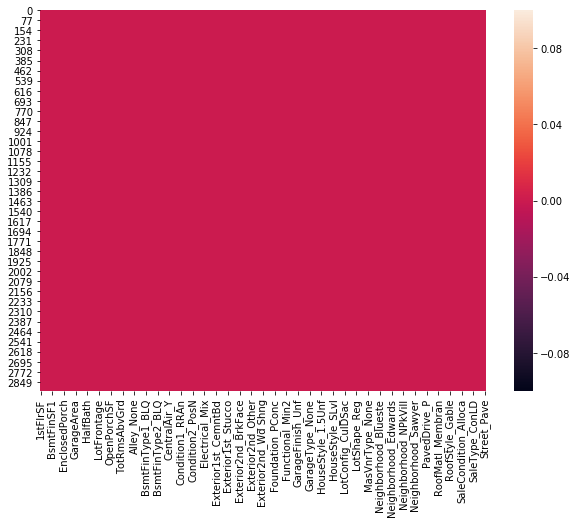

In [84]:
plt.figure(figsize=(10,7))
sns.heatmap(houses_data.isnull())

In [85]:
train_data=houses_data[:x]

In [86]:
x

1460

In [87]:
houses_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave
0,11.692623,11.686189,0.0,3,3,1,11.170327,0.0,0.730463,0.000000,...,0,0,0,0,0,0,0,0,1,1
1,12.792276,0.000000,0.0,3,3,4,12.062832,0.0,0.000000,0.730463,...,0,0,0,0,0,0,0,0,1,1
2,11.892039,11.724598,0.0,3,3,2,10.200343,0.0,0.730463,0.000000,...,0,0,0,0,0,0,0,0,1,1
3,12.013683,11.354094,0.0,3,4,1,8.274266,0.0,0.730463,0.000000,...,0,0,0,0,0,0,0,0,1,1
4,12.510588,12.271365,0.0,4,3,3,10.971129,0.0,0.730463,0.000000,...,0,0,0,0,0,0,0,0,1,1


In [88]:
test_data=houses_data[x:]#.reset_index()

In [89]:
#train_data.SalePrice=np.log1p(train_data.SalePrice)

In [90]:
test_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave
1460,11.818680,0.000000,0.0,2,3,1,10.105326,7.397498,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
1461,12.943735,0.000000,0.0,3,3,1,11.901094,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
1462,11.916131,11.151348,0.0,3,3,1,11.476685,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
1463,11.910125,11.062536,0.0,3,3,1,10.749651,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
1464,12.833625,0.000000,0.0,2,3,1,8.720170,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1


In [91]:
#data=train_data.select_dtypes(include=np.number).interpolate().dropna()
#test_data=test_data.select_dtypes(include=np.number).interpolate().dropna()

#sum(data.isnull().sum())

In [92]:
#train_data.SalePrice=np.log1p(train_data.SalePrice)

In [93]:
train_data['TotalSuperficial'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
test_data['TotalSuperficial'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']

C:\Users\dusic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dusic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Preparing data for making a prediction

In [94]:
rmse_df=pd.DataFrame(columns=['Alg','RMSE'])

In [95]:
y=train_data.SalePrice
x=train_data.drop(['SalePrice','Id'],axis=1)

x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=13,test_size=.2)
test_data.drop('SalePrice',axis=1,inplace=True)

C:\Users\dusic\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [96]:
test_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,TotalSuperficial
1460,11.818680,0.000000,0.0,2,3,1,10.105326,7.397498,0.0,0.0,...,0,0,0,0,0,0,0,1,1,23.593794
1461,12.943735,0.000000,0.0,3,3,1,11.901094,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,25.887470
1462,11.916131,11.151348,0.0,3,3,1,11.476685,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,34.983610
1463,11.910125,11.062536,0.0,3,3,1,10.749651,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,34.882785
1464,12.833625,0.000000,0.0,2,3,1,8.720170,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,25.667250


##### XGBRegressor

In [97]:
import xgboost as xgb
import lightgbm as lgb

In [98]:
lr = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
lr_model=lr.fit(x_train,y_train)
lr_predictions=lr_model.predict(x_test)
print(lr_model.score(x_test,y_test))

C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.8283767009804945


R squared= 0.8283767009804945
RMSE 0.02810669897065486


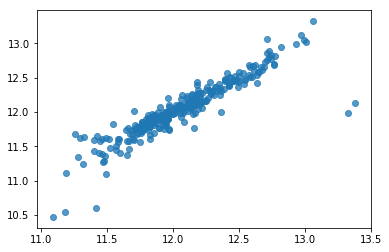

In [99]:
print('R squared=',lr_model.score(x_test,y_test))

rmse_lr=mean_squared_error(y_test,lr_predictions)
print('RMSE',rmse_lr)

rmse_df=rmse_df.append({'Alg':'XGBRegressor','RMSE':rmse_lr}, ignore_index=True)

lr_actual_vals=y_test
plt.scatter(lr_predictions, lr_actual_vals,alpha=.75)
plt.xlabel='Predicted Sale Price'

plt.ylabel='Actual Sale Price'

In [100]:
print(' Predicted \t'+str(np.exp(lr_predictions[10]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[10])))

 Predicted 	95694.12
 Actual 	79001.00000000006


In [101]:
test_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,TotalSuperficial
1460,11.818680,0.000000,0.0,2,3,1,10.105326,7.397498,0.0,0.0,...,0,0,0,0,0,0,0,1,1,23.593794
1461,12.943735,0.000000,0.0,3,3,1,11.901094,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,25.887470
1462,11.916131,11.151348,0.0,3,3,1,11.476685,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,34.983610
1463,11.910125,11.062536,0.0,3,3,1,10.749651,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,34.882785
1464,12.833625,0.000000,0.0,2,3,1,8.720170,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,1,1,25.667250


In [102]:
lr_predictions=lr_model.predict(test_data.drop(['Id'],axis=1))
untransformed_preds=np.exp(lr_predictions)

In [103]:
len(untransformed_preds)

1459

In [104]:
submission=pd.DataFrame()
submission['Id']=test_data['Id']



submission['SalePrice']=untransformed_preds
submission.head(5)

,Id,SalePrice
1460,1461,120352.609375
1461,1462,159595.265625
1462,1463,180650.000000
1463,1464,188099.218750
1464,1465,186438.125000


In [105]:
submission.to_csv('submission.csv',index=False)

##### Ridge Linear regression

In [106]:
rm=linear_model.Ridge(alpha=10**2)
ridge_model=rm.fit(x_train,y_train)
ridge_predictions=ridge_model.predict(x_test)
print(lr_model.score(x_test,y_test))

0.8283767009804945


R squared= 0.786492508484594
RMSE 0.03496606128822369


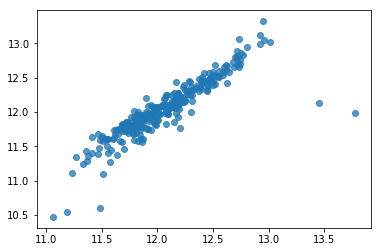

In [107]:
print('R squared=',ridge_model.score(x_test,y_test))

rmse_rlr=mean_squared_error(y_test,ridge_predictions)
print('RMSE',rmse_rlr)
rmse_df=rmse_df.append({'Alg':'Ridge Linear regression','RMSE':rmse_rlr}, ignore_index=True)

ridge_actual_vals=y_test
plt.scatter(ridge_predictions, ridge_actual_vals,alpha=.75)
plt.xlabel='Predicted Sale Price'
plt.ylabel='Actual Sale Price'

In [108]:
print(' Predicted \t'+str(np.exp(ridge_predictions[1]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[1])))

 Predicted 	261546.69527472116
 Actual 	262000.99999999994


In [109]:
print(' Predicted \t'+str(np.exp(ridge_predictions[10]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[10])))

 Predicted 	106564.30790833617
 Actual 	79001.00000000006


In [110]:
predictions_ridge=ridge_model.predict(test_data.drop(['Id'],axis=1))

In [111]:
submission=pd.DataFrame()
submission['Id']=test_data.Id

#features=test_data.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

untransformed_preds=np.exp(predictions_ridge)

print(predictions_ridge[:5],untransformed_preds[:5])

submission['SalePrice']=untransformed_preds

[11.69417563 11.9369039  12.11275152 12.19580183 12.1537836 ] [119871.50134479 152802.86489286 182180.18792681 197956.35014303
 189810.90231321]


In [112]:
submission.head(5)

,Id,SalePrice
1460,1461,119871.501345
1461,1462,152802.864893
1462,1463,182180.187927
1463,1464,197956.350143
1464,1465,189810.902313


In [113]:
submission.to_csv('submission.csv',index=False)

##### RandomForestRegressor

In [114]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=1000)
rfr_model=rfr.fit(x_train,y_train)
rfr_predictions=rfr_model.predict(x_test)

print(rfr_model.score(x_test,y_test))

0.79101304068229


R squared= 0.79101304068229
RMSE 0.03422573501321509


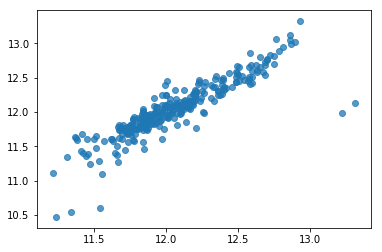

In [115]:
print('R squared=',rfr_model.score(x_test,y_test))

rmse_rfr=mean_squared_error(y_test,rfr_predictions)
print('RMSE',rmse_rfr)
rmse_df=rmse_df.append({'Alg':'RandomForestRegressor','RMSE':rmse_rfr}, ignore_index=True)


plt.scatter(rfr_predictions, y_test,alpha=.75)
plt.xlabel='Predicted Sale Price'
plt.ylabel='Actual Sale Price'

In [116]:
print(' Predicted \t'+str(np.exp(rfr_predictions[1]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[1])))

 Predicted 	289108.4324689911
 Actual 	262000.99999999994


In [117]:
untransformed_preds

array([119871.50134479, 152802.86489286, 182180.18792681, ...,
       171655.43919826, 111086.51970235, 233705.64365397])

In [118]:
print(' Predicted \t'+str(np.exp(rfr_predictions[10]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[10])))

 Predicted 	117211.3194631551
 Actual 	79001.00000000006


In [119]:
predictions_rfr=rfr_model.predict(test_data.drop(['Id'],axis=1))

In [120]:
submission=pd.DataFrame()
submission['Id']=test_data.Id

#features=test_data.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

untransformed_preds=np.exp(predictions_rfr)

print(predictions_ridge[:5],untransformed_preds[:5])

submission['SalePrice']=untransformed_preds

[11.69417563 11.9369039  12.11275152 12.19580183 12.1537836 ] [125316.83641388 154546.30111346 178851.58944143 181756.53307572
 192346.67239169]


In [121]:
submission.head()

,Id,SalePrice
1460,1461,125316.836414
1461,1462,154546.301113
1462,1463,178851.589441
1463,1464,181756.533076
1464,1465,192346.672392


##### GradientBoostingRegressor

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,max_depth=4)
gbr_model=gbr.fit(x_train,y_train)
gbr_predictions=gbr_model.predict(x_test)
print(gbr_model.score(x_test,y_test))

0.8007326754546492


R squared= 0.8007326754546492
RMSE 0.03263395318515245


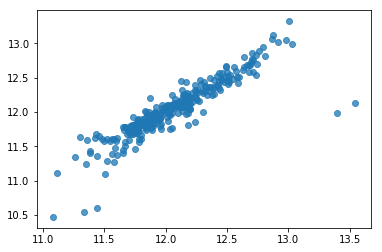

In [123]:
print('R squared=',gbr_model.score(x_test,y_test))
rmse_gbr=mean_squared_error(y_test,gbr_predictions)
print('RMSE',rmse_gbr)
rmse_df=rmse_df.append({'Alg':'GradientBoostingRegressor','RMSE':rmse_gbr}, ignore_index=True)


plt.scatter(gbr_predictions, y_test,alpha=.75)
plt.xlabel='Predicted Sale Price'
plt.ylabel='Actual Sale Price'

In [124]:
print(' Predicted \t'+str(np.exp(gbr_predictions[1]))+'\n Actual \t'+str(np.exp(y_test.reset_index().SalePrice[1])))

 Predicted 	282592.33115258755
 Actual 	262000.99999999994


In [125]:
p=np.exp(gbr_predictions[10])
a=np.exp(y_test.reset_index().SalePrice[10])
print(' Predicted \t'+str(p)+'\n Actual \t'+str(a))
res_gbr=p-a
print('Residual \t',str(res_gbr))

 Predicted 	106872.65090592796
 Actual 	79001.00000000006
Residual 	 27871.650905927905


In [126]:
predictions_gbr=gbr_model.predict(test_data.drop(['Id'],axis=1))

In [127]:
submission=pd.DataFrame()
submission['Id']=test_data.Id

#features=test_data.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

untransformed_preds=np.exp(predictions_gbr)

print(predictions_ridge[:5],untransformed_preds[:5])

submission['SalePrice']=untransformed_preds

[11.69417563 11.9369039  12.11275152 12.19580183 12.1537836 ] [119859.51107142 159128.32487161 184516.14049535 187594.6859582
 188299.86242198]


In [128]:
submission.head()

,Id,SalePrice
1460,1461,119859.511071
1461,1462,159128.324872
1462,1463,184516.140495
1463,1464,187594.685958
1464,1465,188299.862422


In [129]:
# From the above algs-Ridge Linear regression is the best on kaggle but on trainset GradientBoostingRegressor is the best?? !

In [130]:
rmse_df.sort_values('RMSE',ascending=True)

,Alg,RMSE
0,XGBRegressor,0.028107
3,GradientBoostingRegressor,0.032634
2,RandomForestRegressor,0.034226
1,Ridge Linear regression,0.034966


In [131]:
def root_mean_squared_error(mse):
    return np.sqrt(mse)

XGBoost :

LightGBM :
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [132]:
################################################################################

# XGBoost -- I did some "manual" cross-validation here but should really find
# these hyperparameters using CV. ;-)

import xgboost as xgb

regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

regr.fit(x_train,y_train)

# Run prediction on training set to get a rough idea of how well it does.
y_pred = regr.predict(x_test)
print("XGBoost score on training set: ", root_mean_squared_error(mean_squared_error(y_test, y_pred)))

C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBoost score on training set:  0.1592408909181408


In [133]:
# Run prediction on the Kaggle test set.
y_pred_xgb = regr.predict(test_data.drop(['Id'],axis=1))

################################################################################

from sklearn.linear_model import Lasso

# I found this best alpha through cross-validation.
best_alpha = 0.00099

regr = make_pipeline(RobustScaler(),Lasso(alpha=best_alpha, max_iter=50000))
regr.fit(x_train,y_train)

# Run prediction on training set to get a rough idea of how well it does.
y_pred = regr.predict(x_test)
print("Lasso score on training set: ",  root_mean_squared_error(mean_squared_error(y_test, y_pred)))

# Run prediction on the Kaggle test set.
y_pred_lasso = regr.predict(test_data.drop(['Id'],axis=1))

################################################################################

# Blend the results of the two regressors and save the prediction to a CSV file.

y_pred = (y_pred_xgb + y_pred_lasso) / 2
y_pred = np.exp(y_pred)

pred_df = pd.DataFrame(y_pred, index=test_data["Id"], columns=["SalePrice"])
pred_df.to_csv('submission.csv', header=True, index_label='Id')

Lasso score on training set:  0.18216270019472014


### Modelling tryout ODJE

In [134]:
#Validation function

def cross_val(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [135]:
#Base models
#LASSO Regression :
#This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
#Elastic Net Regression :
#again made robust to outliers

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00099, l1_ratio=.9, random_state=3))
#Kernel Ridge Regression :
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
#Gradient Boosting Regression :
#With huber loss that makes it robust to outliers

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
#XGBoost :
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
#LightGBM :
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [136]:
score = cross_val(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1109 (0.0135)



In [137]:
score = cross_val(ENet)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1123 (0.0138)



In [138]:
score = cross_val(GBoost)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1174 (0.0115)



In [139]:
score = cross_val(model_lgb)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1178 (0.0139)



In [140]:
score = cross_val(model_xgb)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dusic\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Lasso score: 0.1209 (0.0143)



In [141]:
score = cross_val(KRR)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.2878 (0.0499)



In [142]:
ENet.fit(x_train,y_train)
GBoost.fit(x_train,y_train)
KRR.fit(x_train,y_train)
lasso.fit(x_train,y_train)
model_lgb.fit(x_train,y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.05, max_bin=55,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=6, min_split_gain=0.0, min_sum_hessian_in_leaf=11,
       n_estimators=720, n_jobs=-1, num_leaves=5, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [143]:
y1 = ENet.predict(test_data.drop(['Id'],axis=1))

In [144]:
y2 = GBoost.predict(test_data.drop(['Id'],axis=1))
y3 = KRR.predict(test_data.drop(['Id'],axis=1))
y4 = lasso.predict(test_data.drop(['Id'],axis=1))
y5 = model_lgb.predict(test_data.drop(['Id'],axis=1))

In [145]:
################################################################################
#LASO ENET GBOOST LGB
#4,1,2,5
# Blend the results of the two regressors and save the prediction to a CSV file.
#(models = (ENet, GBoost, KRR, lasso))


# Run prediction on training set to get a rough idea of how well it does.

#y_pred = y4*0.35+y1*0.3+y2*0.25+y5*0.1

y_pred = y4*0.37+y1*0.3+y2*0.23+y5*0.1
# np.mean([y1,y2,y4],axis=0)

y_pred = np.exp(y_pred)



In [146]:
y_pred

array([117081.78642375, 154564.24087902, 182510.17450018, ...,
       169284.5392649 , 114941.4374951 , 222594.85478372])

In [147]:
y_not_bad = (y1+y4)/2
y_pred_not_bad = np.exp(y_pred)

submission_not_bad=pd.DataFrame()
submission_not_bad['Id']=test_data.Id


submission_not_bad['SalePrice']=y_pred_not_bad

In [148]:
submission_not_bad.head()

,Id,SalePrice
1460,1461,inf
1461,1462,inf
1462,1463,inf
1463,1464,inf
1464,1465,inf


In [149]:
submission=pd.DataFrame()
submission['Id']=test_data.Id


submission['SalePrice']=y_pred

In [150]:
submission.head()

,Id,SalePrice
1460,1461,117081.786424
1461,1462,154564.240879
1462,1463,182510.174500
1463,1464,197560.782910
1464,1465,187251.763469


In [151]:
len(y_pred)

1459

In [152]:
submission.to_csv('submission.csv',index=False)

In [153]:
submission.head()

,Id,SalePrice
1460,1461,117081.786424
1461,1462,154564.240879
1462,1463,182510.174500
1463,1464,197560.782910
1464,1465,187251.763469


from sklearn.model_selection import GridSearchCV

num_estimators = [500,1000,3000]
learn_rates = [0.01, 0.02, 0.05, 0.1]
max_depths = [1, 2, 3, 4]
min_samples_leaf = [5,10,15]
min_samples_split = [2,5,10]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

grid_search = GridSearchCV(GradientBoostingRegressor(loss='huber'),
                           param_grid, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_